# NPL - Working to Make Q&A Systems more Human-like

### Table of Contents

1. [Abstract](#abstract)


2. [Technical Analysis](#analysis)

    2.1 [Obtain Data](#obtain)
    
    2.2 [Clean and Explore Data](#eda)
        
    2.2.1 [Explore Target Variables](#target)
        
    2.2.2 [Clean, Explore and Preprocess Text Features](#text)
        
    2.2.3 [Explore and Preprocess Categorical Feature](#cat)  
       
    2.3 [Model and Evaluate](#model)
       

## 1. Abstract  <a id='abstract'></a>

### Using Natural Language Processing and Neural Networks to help machines better underestand and address subjective and complex questions

The idea for this project was inspired by the [Kaggle competition Google QUEST Q&A Labeling](https://www.kaggle.com/c/google-quest-challenge/overview).

In this project we have a multi-class, multi-label text classification problem. We are trying to predict several qualitative measures (our targets) for questions made by customers online. Our dataset consists of over six thousand samples, with questions (text) and other features, and its correspondent targets labelled by volunteers at Google Research CrowdSource. 

We use an OSEMN methodology and apply Natural Language Processing tools, machine learning models such as K-Nearest Neighbors and Random Forest using Pipelines, as well as pre-trained GloVe word embeddings and Neural Network models with Keras in order to tackle our problem.

We were able to achieve an overall accuracy of 84% with a Neural Network model using GloVe embeddings, with varying precision, recall and f1 scores depending on the target. 

Our data suffers from some class imbalance, where the more complex targets are in fact also the ones with less samples. These targets had the worst performance, not only because they are the complex and thus difficult for the machines to interpret, but also because of the small number of samples. We recommend our stakeholder increasing the data acquisition. More data, especially covering the targets that were underrepresented, can help improve our model further.

### 2. Technical Analysis <a id='analysis'></a>


In this project I'm supposing my stakeholder is an organization that receives an influx of consumer-generated questions that require answers that can be done by other customers or by the company itself. This is the case of companies that sell their products on Amazon, for example, or that have a questions session under their webssites product descriptions. The company has a Q&A system in operation, but it wants to improve upon it.

Some customer questions are simple and direct. These questions usually have a commonly accepted answer and expect a short and instructional or factual reply. The company's Q&A system or chatbot can do a reasonably good job answering these types of questions.

Other questions, however, are more subjective and require a deeper understanding of context. The later are usually questions that are seeking opinions or personal recommendations for specific problems. They can also be more conversational in nature. 

The data we are using, which we acquired from Kaggle on the competition mentioned above, was gathered by the CrowdSource team at Google Research. It consists of a little over six thousand question-answers pairs from close to 70 different Q&A websites at StackExchange, all of which were evaluated and rated by human volunteers on a number of quality scoring aspects.

**The goal of this project is to build a predictive algorithm for classifying subjective aspects of questions**. 

We want our model to be able to predict how a human would classify the questions in terms of several qualitative aspects, which will inform our stakeholder of the nature of such questions. With it, our stakeholder will be able to filter, prioritize and address its users' questions in order to provide the best possible answers quickly. Using a classification of the questions it receives, our stakeholder can direct simple, factual questions to his Q&A system and have a human take care of the more complex questions.

Ultimately, an algorithm that can accurately predict such subjective labels for complex questions can contribute to making Q&A systems more human-like.

This type of problem gives us a multi-class, multi-label classification task. We will use Natural Language Processing, Machine Learning and Neural Networks to tackle it.

We will load the data that we have downloaded from Kaggle and select only the data that is relevant for the problem we are proposing in this project. 

We then will explore it and prepare it for modeling. We will clean and tokenize our text data using NLTK tools. 

Our initial step will be to use machine learning models that can handle our type of problem (a multi-class, multi-label classification), and evaluate the results of such models.

Further, we will move on to use of pre-trained word embeddings with GloVe, and to neural network models with Keras, in hopes to improve our model performance.


In [129]:
# # import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set_style('white')
%matplotlib inline

import re
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from category_encoders.one_hot import OneHotEncoder

import joblib
import warnings
warnings.filterwarnings("ignore")
np.random.seed(123)

## 1. Obtain Data  <a id='obtain'></a>

Now we start by getting our data. We have downloaded the data file from Kaggle - you can find it [here](https://www.kaggle.com/c/google-quest-challenge/data).

In [12]:
# import data downloaded from Kaggle
df = pd.read_csv('train.csv')

In [13]:
# check overall aspect of data
df.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [14]:
# check overall info from dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6079 entries, 0 to 6078
Data columns (total 41 columns):
qa_id                                    6079 non-null int64
question_title                           6079 non-null object
question_body                            6079 non-null object
question_user_name                       6079 non-null object
question_user_page                       6079 non-null object
answer                                   6079 non-null object
answer_user_name                         6079 non-null object
answer_user_page                         6079 non-null object
url                                      6079 non-null object
category                                 6079 non-null object
host                                     6079 non-null object
question_asker_intent_understanding      6079 non-null float64
question_body_critical                   6079 non-null float64
question_conversational                  6079 non-null float64
question_expect_short_a

In [15]:
# confirming there are no NaNs
df.isna().sum().sum()

0

### Select relevant data

The data aquisition was simple for this project, and luckly we don't have any missing values. We will not be using all of this data for our task in this project though, so we will filter the data to what we are going to assume is of interest to our stakeholder only. 

First, we are only focusing on the **questions**, and not the answers. In addition, some of the quality rating features for the questions are not very clear and were not further explained on the competition on Kaggle, so we will refrain from using them and focus only on the labels that make sense for our stakeholder' purpose of flagging complex and subjective questions.

In [16]:
# selecting only relevant question features
question_columns = ['question_title', 'question_body','category']
features = df[question_columns]

# selecting only the question target columns we will be working with
target_columns = ['question_asker_intent_understanding', 'question_conversational', 'question_expect_short_answer'
                  , 'question_fact_seeking', 'question_has_commonly_accepted_answer', 'question_multi_intent'
                  , 'question_opinion_seeking', 'question_well_written']
target = df[target_columns]

### Split data now to avoid leakage
To avoid data leakage, we want to split our data from now on, preserving part of the data as unseen for testing our models further ahead.

In [17]:
# split data to avoid leakage
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123)

print(f'Features train shape:{X_train.shape}, Target train shape:{y_train.shape}')
print(f'Features test shape:{X_test.shape}, Target test shape:{y_test.shape}')

Features train shape:(4863, 3), Target train shape:(4863, 8)
Features test shape:(1216, 3), Target test shape:(1216, 8)


We have some negative correlation between the two targets "question_opinion_seeking" and "question_fact_seeking", which makes total sense. 

## 2. Clean and Explore Data  <a id='eda'></a>

The next steps on a ONSEM data science process, once you've obtained your data, is clean and explore it. When we are working with text data and Natural Language Processing we approach this step by cleaning our text data from punctuation, stopwords and other characters that might not add much value to our project. We also need to preprocess it into a numerical form so that we can feed it to our machine learning and neural network models.

For this particular problem, we will also look at some preprocessing of our target values, in order to make our task more easily adaptable to a number of classification models.

### Explore target variables  <a id='target'></a>


Let's inspect our target columns to see what type of prediction or classification we are aiming for.

In [18]:
# checking main statistics of target columns
y_train.describe()

,question_asker_intent_understanding,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_multi_intent,question_opinion_seeking,question_well_written
count,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000
mean,0.893573,0.055658,0.701693,0.771574,0.792721,0.237302,0.428576,0.801117
std,0.132757,0.179406,0.349753,0.303836,0.336237,0.335107,0.366751,0.178579
min,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
25%,0.777778,0.000000,0.500000,0.666667,0.666667,0.000000,0.000000,0.666667
50%,0.888889,0.000000,0.666667,1.000000,1.000000,0.000000,0.333333,0.833333
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.333333,0.666667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


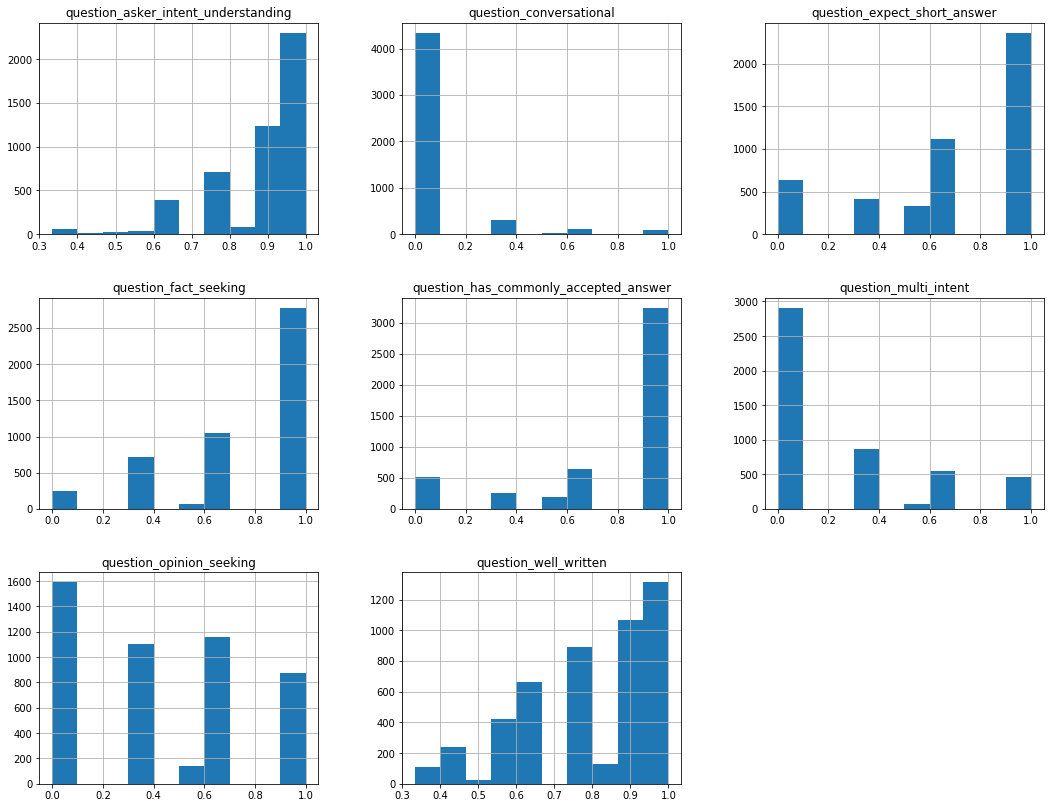

In [19]:
# check distributions of target variables
y_train.hist(figsize=(18, 14));

We can see some imbalance in some of our targets. Additionally, even though our targets are presented in our data as continuous variables, they are the average of the binary rankings done by several individuals. We can decide to use them as they are, or to convert them into binary targets using criteria, which would make our classification prediction a little bit more intuitive. Converting our targets into binary values would allow us, for example, to approach our multi-label classification task using a Binary Relevance or Classifier Chains.

Let's also check the correlation between our targets.

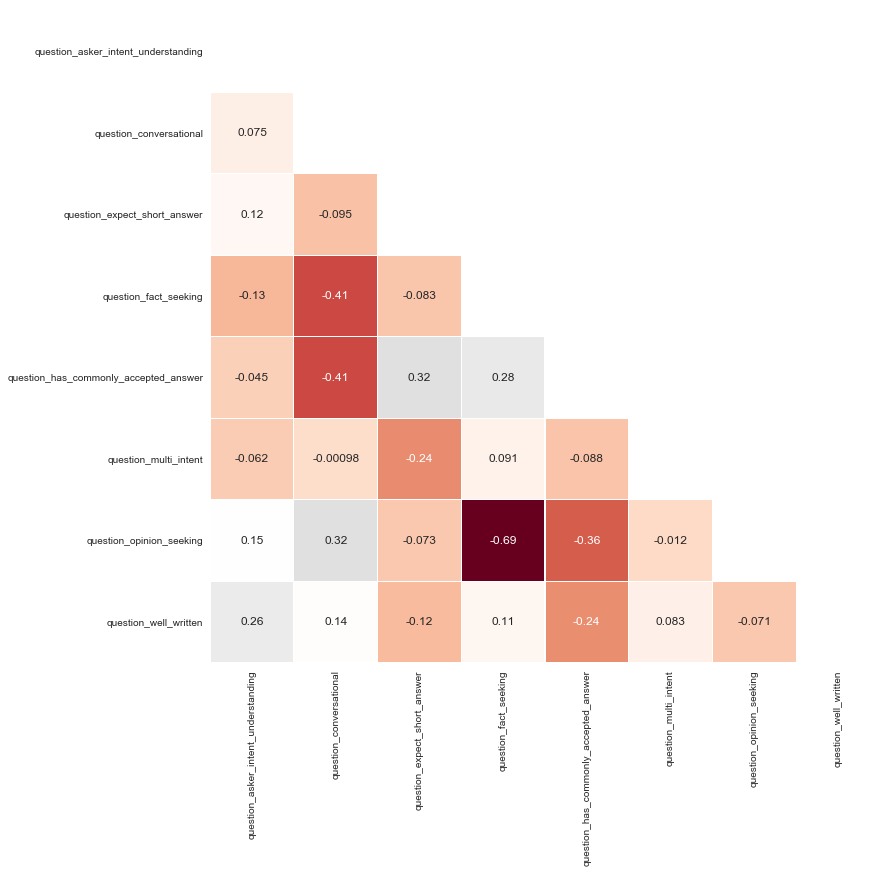

In [24]:
fig, ax = plt.subplots(figsize=(12, 12))
matrix = np.triu(y_train.corr())
sns.heatmap(y_train.corr(), ax=ax, annot=True, linewidths=.02, 
            cmap= 'RdGy',mask=matrix, annot_kws={"size":12}, cbar=False);

### Preprocess target variables

Like we mentioned above, it will be helpful and allow us to use certain multi-label classification models if we transform our targets from continuous to binary values. Remember, the target values are averages of original binary rankings done by several individual rankers, and our stakeholders are interested in flagging the type of questions where a machine comprehension might have a hard time answering properly (complex questions). Let's do this before we move to our modeling stage of this project.

In [28]:
# tranform continuous values into binary categorical ones
for column in y_train:
    y_train[column] = np.where(y_train[column] >= .5, 1, 0)

# check it worked fine
y_train.head()

,question_asker_intent_understanding,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_multi_intent,question_opinion_seeking,question_well_written
4267,1,0,1,0,1,0,1,1
2641,1,0,1,1,0,0,1,1
838,1,0,1,1,1,0,1,1
553,1,0,0,1,1,0,0,1
5428,1,0,1,0,1,0,1,1


In [29]:
# do the same for test data
for column in y_test:
    y_test[column] = np.where(y_test[column] >= .5, 1, 0)

In [30]:
categories = list(y_train.columns.values)
count = []
for i in categories:
    count.append((i, y_train[i].sum()))
target_stats = pd.DataFrame(count, columns=['category', 'number_of_comments'])
target_stats

,category,number_of_comments
0,question_asker_intent_understanding,4796
1,question_conversational,223
2,question_expect_short_answer,3811
3,question_fact_seeking,3898
4,question_has_commonly_accepted_answer,4078
5,question_multi_intent,1091
6,question_opinion_seeking,2173
7,question_well_written,4514


Text(0.5, 0, 'number of occurrences')

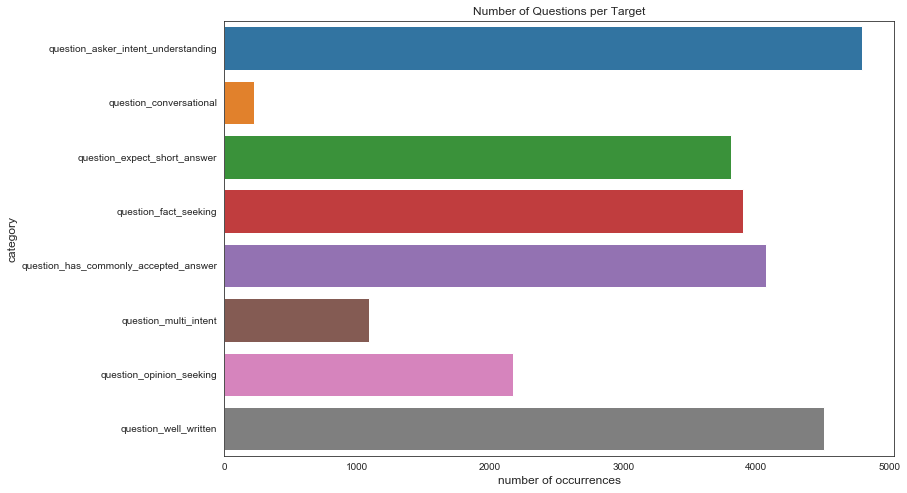

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x='number_of_comments', y='category', data= target_stats);
plt.title('Number of Questions per Target')
plt.ylabel('category', fontsize=12)
plt.xlabel('number of occurrences', fontsize=12)

We can see that only a few of the questions in our train data are conversational and have more than one intent, while most are considered that their intent is understandable and that they are well-written.

### Clean and Preprocess Text Data <a id='text'></a>

Now we move on to cleaning, preprocessing and exploring our features. Let's start by creating a function that will take the text columns and clean them: lower case, remove single characters, punctuation, numbers, etc.

In [32]:
def clean_text(text):

    '''Takes a corpus of text and applies regex to clean it, removing punctuation, numbers, single characters,
multiples spaces and stopwords. Converts all text to lower case. Returns cleaned text.'''
    
    # Remove punctuations and single numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Remove sequences of numbers
    text = re.sub(r'\d+', ' ', text)

    # Remove single character
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    
    # lowercase everything
    text = text.lower().split()
    
    # remove stopwords
    text = [w for w in text if not w in stopwords]    
    text = " ".join(text)
    
    return text

In [37]:
# list text columns
columns = ['question_title','question_body']

# clean train text data
for col in columns:
    X_train[col] = X_train[col].apply(lambda x: clean_text(x))

# clean test text data
for col in columns:
    X_test[col] = X_test[col].apply(lambda x: clean_text(x))

In [38]:
# check if all worked fine
X_train.head(10)

,question_title,question_body,category
4267,create valid xml xsd loaded runtime without xs...,possible duplicate programmatically create xml...,STACKOVERFLOW
2641,enumerating motivations correct write firstly ...,suppose enumerating reasons fly correct write ...,CULTURE
838,hard self collision make particles occupy space,default blender particles spatial extension fi...,TECHNOLOGY
553,removing unwanted color w image aperture,shooting ilford color process amp film local p...,LIFE_ARTS
5428,binary tree traversal without using recursion,anyone help create binary tree non recursive p...,STACKOVERFLOW
5301,owning home paying mortgage fit family savings...,mid aiming long term growth higher risk portfo...,LIFE_ARTS
5002,convert serial port returned byte millisecond,hey guys issue working iport one commands send...,STACKOVERFLOW
969,excel web access web part error,asked related question stack overflow hence fo...,TECHNOLOGY
5453,put sty cls file project,want use sty cls file project know following t...,TECHNOLOGY
3825,c compiler supported windows,problem finding compiler support windows progr...,TECHNOLOGY


In [39]:
# check what are our datatypes for our cleaned text columns
type(X_train.iloc[0]), type(X_train.iloc[0][0]), type(X_train.iloc[0][0][0])

(pandas.core.series.Series, str, str)

Great! Once we applied our function we now have our dataframe columns as series that contain strings. Let's also make sure we tokenize our text so that we can have a look at our corpus. What are the most frequent words used in the titles and in the questions?

In [40]:
# gather all words for title and body of questions
all_words = X_train['question_title'] + X_train['question_body']
all_words[0]

'losing using extension tubes instead macro lensplaying around macro photography cheap read reversed lens rev lens mounted straight lens passive extension tubes would like get problems techniques used focus manual aperture control problematic best limited setup still subjects read dead insects spring approaching want able shoot live insects believe autofocus settable aperture great help one obvious expensive option macro lens say ef mm macro however really interested yet another prime lens alternative electrical extension tubes except maximum focusing distance losing using tubes coupled fine lens say ef instead macro lens'

In [41]:
# define function to tokenize text
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [44]:
# tokenize all words
tokens = all_words.apply(lambda x: preprocess_text(x))

In [45]:
# check result
tokens[0]

['losing',
 'using',
 'extension',
 'tubes',
 'instead',
 'macro',
 'lensplaying',
 'around',
 'macro',
 'photography',
 'cheap',
 'read',
 'reversed',
 'lens',
 'rev',
 'lens',
 'mounted',
 'straight',
 'lens',
 'passive',
 'extension',
 'tubes',
 'would',
 'like',
 'get',
 'problems',
 'techniques',
 'used',
 'focus',
 'manual',
 'aperture',
 'control',
 'problematic',
 'best',
 'limited',
 'setup',
 'still',
 'subjects',
 'read',
 'dead',
 'insects',
 'spring',
 'approaching',
 'want',
 'able',
 'shoot',
 'live',
 'insects',
 'believe',
 'autofocus',
 'settable',
 'aperture',
 'great',
 'help',
 'one',
 'obvious',
 'expensive',
 'option',
 'macro',
 'lens',
 'say',
 'ef',
 'mm',
 'macro',
 'however',
 'really',
 'interested',
 'yet',
 'another',
 'prime',
 'lens',
 'alternative',
 'electrical',
 'extension',
 'tubes',
 'except',
 'maximum',
 'focusing',
 'distance',
 'losing',
 'using',
 'tubes',
 'coupled',
 'fine',
 'lens',
 'say',
 'ef',
 'instead',
 'macro',
 'lens']

Great, now that we have all our text data cleaned and tokenized, let's take a little pause here to explore our corpus a little more. Let's have a look at our vocabulary size and word frequency.

In [48]:
# check the word frequency
title_freqdist = FreqDist([word for text in tokens for word in text])
title_freqdist.most_common(20)

[('gt', 6996),
 ('lt', 5738),
 ('would', 1975),
 ('like', 1932),
 ('get', 1931),
 ('one', 1703),
 ('using', 1536),
 ('use', 1512),
 ('new', 1401),
 ('want', 1233),
 ('code', 1206),
 ('id', 1201),
 ('way', 1182),
 ('time', 1147),
 ('file', 1106),
 ('class', 1041),
 ('data', 1040),
 ('know', 1040),
 ('name', 963),
 ('set', 935)]

In [49]:
# check size of our data vocabulary 
vocab = set(title_freqdist)
len(vocab)

26643

Let's make a little word cloud as well to visualize our vocabulary because they're fun.

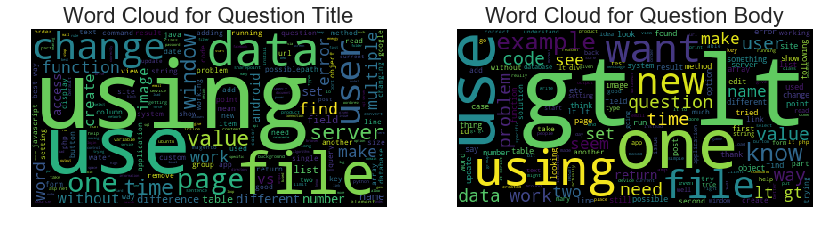

In [52]:
# Make wordcloud for title and body for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 18))

title_text = ' '.join(X_train['question_title'].values)
axes[0].imshow(WordCloud().generate(title_text))
axes[0].set_title('Word Cloud for Question Title', size=22)
axes[0].axis("off")

body_text = ' '.join(X_train['question_body'].values)
axes[1].imshow(WordCloud().generate(body_text))
axes[1].set_title('Word Cloud for Question Body', size=22)
axes[1].axis("off")

plt.show()

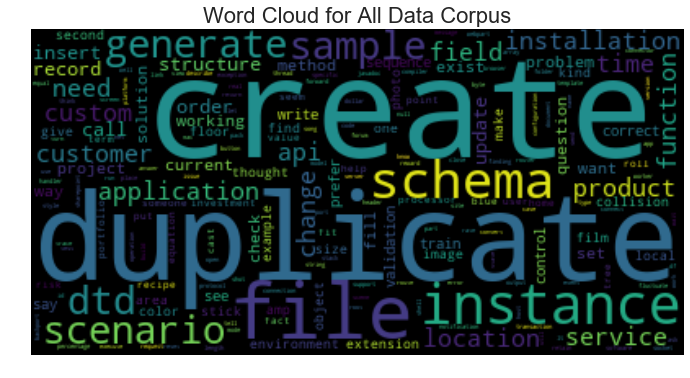

In [53]:
# Create and generate a word cloud image for question titles:
plt.figure(figsize=(14, 6))
text = " ".join(list(title_freqdist.keys()))
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for All Data Corpus', size=22)
plt.axis("off")
plt.show()

Interesting. We see some words that are very frequent and at first sight don't convey meaning, such as gt and lt. They might be technology-related terms, or they might be mispellings and that would mean our preprocessing can be improved. For now we will move on with this data and see what results we can get from it.

One additional thing we can do, though, is to do some feature engineering, creating some additional feature columns with information that can be helpful for our models. A simple feature engineering task when working with natural language processing is to count the lenght of texts by number of words or characters. Let's calculate the number of characters for each text column and add that to our features.

In [54]:
# define function to count words
def text_lenght(row):
    return row.count(' ')

In [55]:
def charac_lenght(row):
    return len(row)

In [56]:
# apply function to train and test dataframes
X_train['title_characters'] = X_train['question_title'].apply(charac_lenght)
X_train['body_characters'] = X_train['question_body'].apply(charac_lenght)

X_test['title_characters'] = X_test['question_title'].apply(charac_lenght)
X_test['body_characters'] = X_test['question_body'].apply(charac_lenght)

In [57]:
# apply function to train and test dataframes
X_train['title_lenght'] = X_train['question_title'].apply(text_lenght)
X_train['body_lenght'] = X_train['question_body'].apply(text_lenght)

X_test['title_lenght'] = X_test['question_title'].apply(text_lenght)
X_test['body_lenght'] = X_test['question_body'].apply(text_lenght)

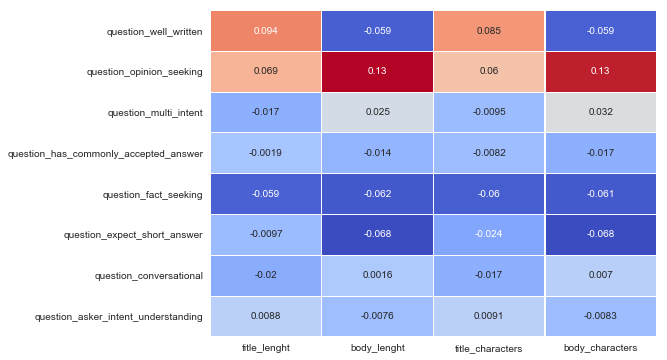

In [59]:
new_feat = ['title_lenght', 'body_lenght', 'title_characters', 'body_characters']
new_feat_df = pd.concat([X_train[new_feat], y_train], axis=1)
new_feat_corr = new_feat_df.corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(new_feat_corr[new_feat].iloc[4:], 
            ax=ax, annot=True, linewidths=.02, 
            cmap= 'coolwarm', annot_kws={'size':10}, cbar=False)
sns.set(font_scale=1)
plt.yticks(rotation = 0)
ax.invert_yaxis()
plt.show()

We see some small correlation between question body lenght and opinion seeking target.

### Explore and Preprocess Categorical Feature <a id='cat'></a>

Let's also take a moment to explore our feature 'category', that is not made of text.

In [60]:
# checking number of categories and distribution of category column
X_train['category'].value_counts()

TECHNOLOGY       1984
STACKOVERFLOW     972
CULTURE           778
SCIENCE           573
LIFE_ARTS         556
Name: category, dtype: int64

This column is clearly a categorical one. Let's make sure it is of category type.

In [61]:
# transform column into category type
X_train['category'] = X_train['category'].astype('category')

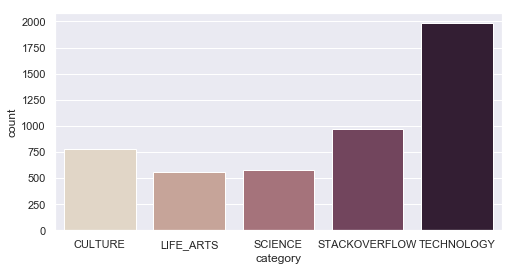

In [62]:
# visualize distribution of categories
f = plt.subplots(figsize=(8, 4))
sns.countplot(x='category', palette='ch:.25', data=X_train);

Let's see how each category affects our targets:

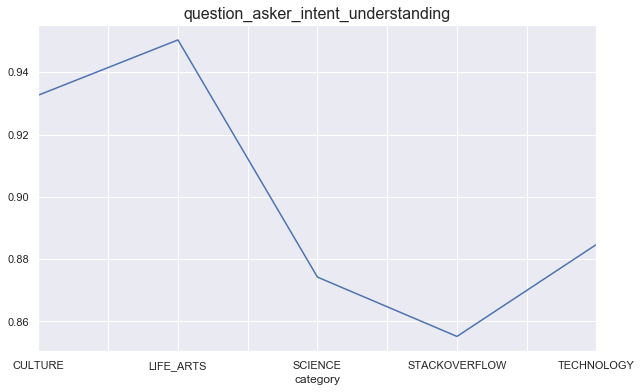

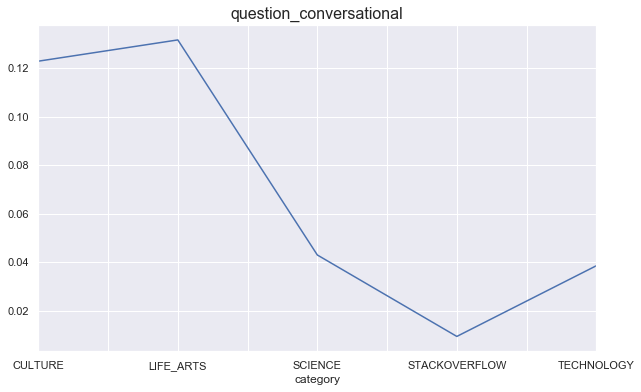

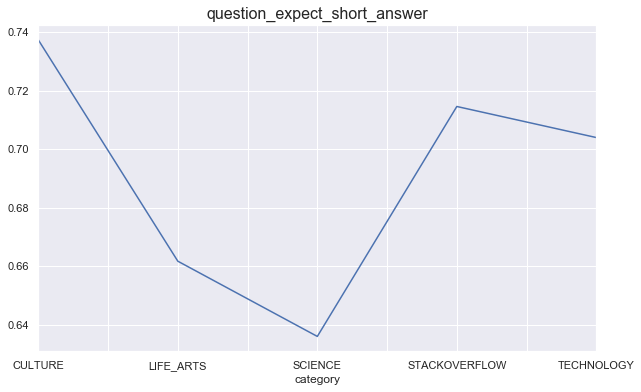

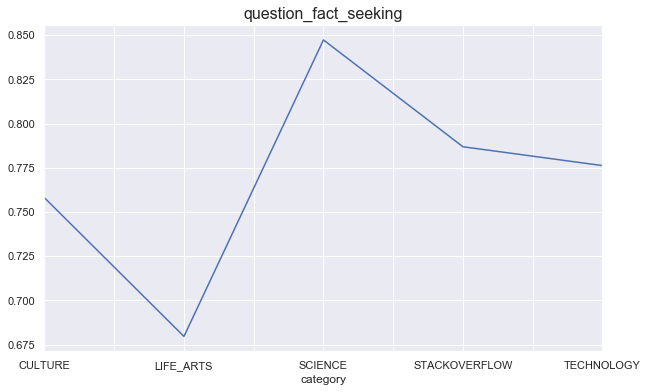

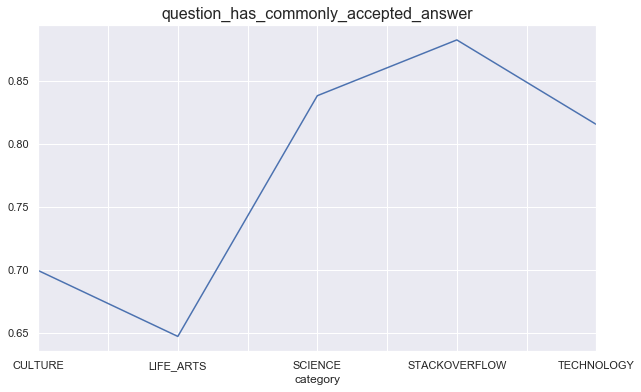

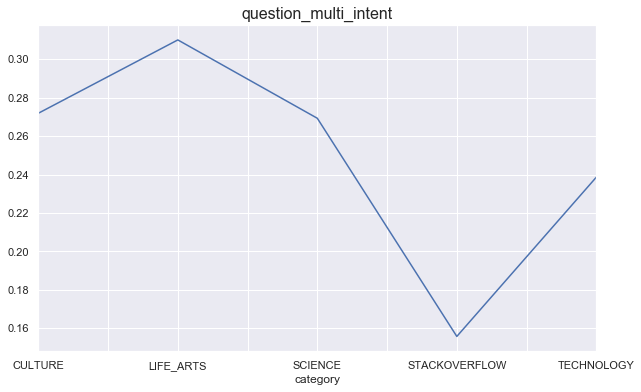

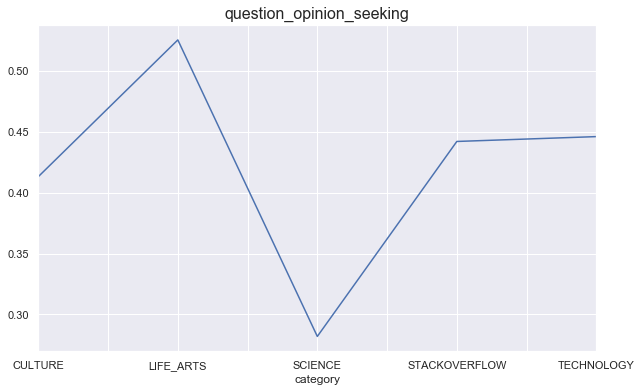

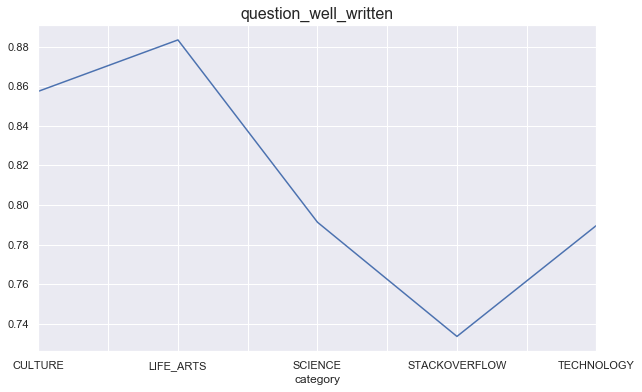

In [63]:
for idx in range(8):
    df_a = df.groupby('category')[y_train.columns[idx]].mean()
        
    fig, axes = plt.subplots(1, 1, figsize=(10,6))
    axes.set_title(y_train.columns[idx], fontsize=16)
    df_a.plot(label=y_train.columns[idx])
    plt.show()

We can see that there is a clear variation on target values according to each category! We certainly want to add this feature to our model, and we will need to one hot encode them.

## 3. Model, Predict, Evaluate <a id='model'></a>

Now that our data is clean and we have done some exploration, we can start to model it and make our predictions. Remember, though, that in order to pass our text data into machine or neural network models we still need to vectorize it, but we will include this task as part of a pipeline (which will also one hot encode our categorical feature). 

We have a few options on how to go do our vectorization of our text features. We can start by trying a TF_IDF vectorization, and see how it performs. We can also try to use word embeddings and pre-trained models like GloVe or Bert as part of a neural network. 

### TF-IDF

We will try using TF-IDF for our text vectorization as a first try. We will construct a pipeline that vectorizers our text columns, and also takes care of our categorical feature.

In [103]:
# create a pipeline with the initiating text encoder steps for TF_IDF
text_encoder = Pipeline([
    ('Text-TF-IDF', TfidfVectorizer(ngram_range=(1, 3))),
    ('Text-SVD', TruncatedSVD(n_components=100))], verbose=True)

In [104]:
# initiate the one-hot encoder
ohe = OneHotEncoder(cols='category', drop_invariant=True)

In [105]:
# initiate preprocessor
preprocessor = ColumnTransformer(transformers=[('tfidf_title', text_encoder, 'question_title'),
                                               ('tfidf_body', text_encoder, 'question_body'),
                                               ('category', ohe, 'category'),
                                               ('scaler', StandardScaler(), ['title_lenght', 'body_lenght', 
                                                'title_characters', 'body_characters'])])

In [106]:
X_train_tf = preprocessor.fit_transform(X_train)

[Pipeline] ....... (step 1 of 2) Processing Text-TF-IDF, total=   0.3s
[Pipeline] .......... (step 2 of 2) Processing Text-SVD, total=   2.5s
[Pipeline] ....... (step 1 of 2) Processing Text-TF-IDF, total=   5.0s
[Pipeline] .......... (step 2 of 2) Processing Text-SVD, total=  40.0s


In [107]:
X_test_tf = preprocessor.transform(X_test)

In [108]:
X_train_tf.shape, y_train.shape

((4863, 209), (4863, 8))

### Fit Model

Our problem at hand is a multi-label classification problem, where our output is made of 8 different targets - or categories - each with a binary classification output (after we processed it into this format). Each of our samples can be classified as any, several, or all of the different targets. That is different from multi-class, when there are more than 2 possible classes but each sample can only be classified as one of the several classes. 

There are several Scikit-learn classifiers that support this type of classification task. Let's experiment with some of them to see what results we can get. We will start with a k-nearest neighbor.


#### K-Nearest Neighbor

In [109]:
# initiate and fit KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [110]:
knn.score(X_train_tf, y_train)

0.37816162862430597

In [111]:
knn.score(X_test_tf, y_test)

0.2450657894736842

Let's test some values of K to see if we can achieve a better result with this type of model.

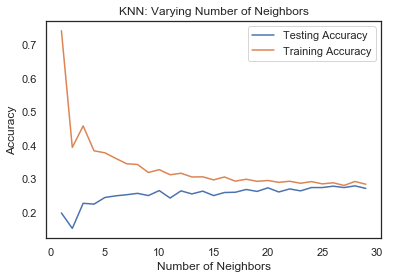

In [112]:
# try K=1 through K=30 and record testing accuracy
k_range = range(1, 30)

# set scores for record
train_scores = []
test_scores = []

# Loop through the range 1 to 30 and append the scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tf, y_train)
    train_scores.append(knn.score(X_train_tf, y_train))
    test_scores.append(knn.score(X_test_tf, y_test))
    
# Generate plot for visualization
plt.title('KNN: Varying Number of Neighbors')
plt.plot(k_range, test_scores, label = 'Testing Accuracy')
plt.plot(k_range, train_scores, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [113]:
# let's have a better look at all the numbers for our accuracy
df = pd.DataFrame([train_scores, test_scores], columns=k_range).T
df.columns = ['Training', 'Testing']
df

,Training,Testing
1,0.741723,0.199013
2,0.394201,0.152961
3,0.458153,0.227796
4,0.384125,0.225329
5,0.378162,0.245066
6,0.361505,0.250000
7,0.345671,0.253289
8,0.343409,0.257401
9,0.319556,0.250822
10,0.327987,0.265625


Our accurary increased a bit but we might be reaching our best performance by k=20 or k=24. Let's try a different machine learning model that can also handle our type of problem. Let's see how a random forest performs.


#### Random Forest

In [114]:
# initiate and fit random forest model
rf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [115]:
# get predictions
rf_predictions = rf.predict(X_test_tf)

In [116]:
# check accurary score
print(metrics.accuracy_score(y_test, rf_predictions))

0.23355263157894737


We did better so far with the K-nearest neighbors than with the Random Forest. Let's run a random grid search to try to get a better result tuning our hyperparameters.

In [117]:
# random_grid = {'max_depth': [10, 20, 40, 60, 100],
#      'max_features': ['auto', 'sqrt'],
#      'min_samples_leaf': [1, 2, 4],
#      'min_samples_split': [2, 5, 10],
#      'n_estimators': [100, 200, 400, 800]}

# rf_grid = RandomForestClassifier()

In [118]:
# rf_random = RandomizedSearchCV(estimator=rf_grid, param_distributions=random_grid, 
#                                n_iter=100, cv=3, verbose=1, random_state=123, n_jobs=-1)

In [119]:
# t = time()
# rf_random.fit(X_train_tf, y_train)
# print(time()-t)

# # save grid search
# joblib.dump(rf_random, 'rf_random.joblib')

In [120]:
# Load model
rf_random = joblib.load('rf_random.joblib') 

In [121]:
# check what are the best parameters
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [122]:
# check train accuracy score
print(f'Train accuracy: {rf_random.score(X_train_tf, y_train)}')

# check test accuracy score
print(f'Test accuracy: {rf_random.score(X_test_tf, y_test)}')

Train accuracy: 0.35924326547398727
Test accuracy: 0.29769736842105265


In [123]:
# check classification report as well
print(metrics.classification_report(y_test, rf_random.predict(X_test_tf), target_names=target.columns))

                                       precision    recall  f1-score   support

  question_asker_intent_understanding       0.99      1.00      0.99      1203
              question_conversational       0.50      0.06      0.11        63
         question_expect_short_answer       0.78      0.99      0.87       940
                question_fact_seeking       0.83      1.00      0.90       989
question_has_commonly_accepted_answer       0.85      0.99      0.92      1020
                question_multi_intent       0.89      0.03      0.06       277
             question_opinion_seeking       0.65      0.35      0.46       543
                question_well_written       0.93      1.00      0.96      1127

                            micro avg       0.86      0.89      0.88      6162
                            macro avg       0.80      0.68      0.66      6162
                         weighted avg       0.86      0.89      0.84      6162
                          samples avg       0.87  

Now our Random Forest performed slightly better than our K-nearest Neighbors. I want to try a different method: using a One vs. Rest classifier wrapper, which fits one classifier per class. For each classifier, the class is fitted against all the other classes.

In [127]:
rf_2 = OneVsRestClassifier(RandomForestClassifier(n_estimators=400, min_samples_leaf=1,
                                                  max_depth=10, min_samples_split=5, 
                                                  max_features='auto'))
rf_2.fit(X_train_tf, y_train)
# check train accuracy score
print(f'Train accuracy: {rf_2.score(X_train_tf, y_train)}')

# check test accuracy score
print(f'Test accuracy: {rf_2.score(X_test_tf, y_test)}')

Train accuracy: 0.4351223524573309
Test accuracy: 0.2870065789473684


In [128]:
print(metrics.classification_report(y_test, rf_2.predict(X_test_tf), target_names=target.columns))

                                       precision    recall  f1-score   support

  question_asker_intent_understanding       0.99      1.00      0.99      1203
              question_conversational       0.62      0.08      0.14        63
         question_expect_short_answer       0.78      0.99      0.87       940
                question_fact_seeking       0.83      0.99      0.90       989
question_has_commonly_accepted_answer       0.85      0.99      0.92      1020
                question_multi_intent       0.60      0.09      0.16       277
             question_opinion_seeking       0.63      0.45      0.53       543
                question_well_written       0.93      1.00      0.96      1127

                            micro avg       0.86      0.90      0.88      6162
                            macro avg       0.78      0.70      0.69      6162
                         weighted avg       0.84      0.90      0.86      6162
                          samples avg       0.86  

That didn't improve so much our scores. Our test accuracy actually went down, although we can see that especially for our targets with low positive occurence like 'question_conversational', 'question_multi_intent' and 'question_opinion_seeking' the recall and f1 scores have improved a bit. As expected, our machine has a much harder time understanding a complex question! 

Perharps we can move on to more advanced techniques, like using pre-trained word embeddings. 